In [ ]:
# Importing necessary libraries for data manipulation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split


loading data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Loading the dataset
file_path = '/content/drive/MyDrive/heart_attack_prediction_dataset.csv'
data1 = pd.read_csv(file_path)

# Displaying the first few rows of the dataset for initial inspection
data1.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


Pre-processing Data

In [ ]:
# Splitting the dataset into training and test sets
# Assuming 'Heart Attack Risk' is the target variable
train_data, test_data = train_test_split(data1, test_size=0.2, random_state=42, stratify=data1['Heart Attack Risk'])

# Reassigning train_data to data for compatibility with the existing code
data = train_data

In [ ]:
# Dropping irrelevant columns: Patient ID, Country, Continent, Hemisphere
# These columns aren't helpful for predicting heart attack risk
data = data.drop(['Patient ID', 'Country', 'Continent', 'Hemisphere'], axis=1)
data.head() # Displaying the updated DataFrame

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
1034,21,Male,250,109/76,78,1,0,1,0,1,...,1,1,4,11.451720,273208,23.575795,176,2,5,0
5408,41,Male,172,134/106,83,1,1,1,1,0,...,1,0,3,9.373237,103732,25.773309,251,2,8,0
7150,45,Male,158,116/75,84,1,1,1,0,1,...,1,0,2,0.025076,268700,35.708303,669,0,10,0
2392,54,Male,305,139/108,50,0,0,1,0,0,...,1,1,9,3.497380,294649,31.196970,562,7,5,1
3658,68,Female,373,101/73,55,1,1,1,1,1,...,0,1,8,5.502847,47821,25.215830,48,1,6,1


In [ ]:
# Replacing categorical 'Diet' values with numerical ones for easier model interpretation
data['Diet'] = data['Diet'].map({
    'Healthy': 1, # assigning 'Healthy' a value of 1
    'Average': 0, # assigning 'Average' a value of 0
    'Unhealthy': -1 # assigning 'Unhealthy' a value of -1
})

# converting 'Sex' column into numeric values: male as 1, female as 0
data['Sex'] = data['Sex'].map({'Male': 1, 'Female': 0})

# displaying the updated DataFrame after mapping categorical values
data.head()

,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
1034,21,1,250,109/76,78,1,0,1,0,1,...,1,1,4,11.451720,273208,23.575795,176,2,5,0
5408,41,1,172,134/106,83,1,1,1,1,0,...,1,0,3,9.373237,103732,25.773309,251,2,8,0
7150,45,1,158,116/75,84,1,1,1,0,1,...,1,0,2,0.025076,268700,35.708303,669,0,10,0
2392,54,1,305,139/108,50,0,0,1,0,0,...,1,1,9,3.497380,294649,31.196970,562,7,5,1
3658,68,0,373,101/73,55,1,1,1,1,1,...,0,1,8,5.502847,47821,25.215830,48,1,6,1


In [ ]:
# using describe() to get statistical summary of numerical columns
data.describe()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,...,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000,7010.000000
mean,53.640371,0.697147,260.376890,75.045221,0.647218,0.493581,0.895720,0.502425,0.593723,10.028048,...,0.496006,0.494579,5.465050,6.022300,157964.185592,28.829208,416.049786,3.497575,7.001141,0.358203
std,21.180466,0.459525,81.048115,20.601383,0.477870,0.499994,0.305645,0.500030,0.491172,5.792450,...,0.500020,0.500006,2.867003,3.468821,81015.051045,6.326492,222.679709,2.299096,1.989127,0.479506
min,18.000000,0.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004443,...,0.000000,0.000000,1.000000,0.001263,20162.000000,18.004211,30.000000,0.000000,4.000000,0.000000
25%,35.000000,0.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,5.022926,...,0.000000,0.000000,3.000000,3.027409,86993.500000,23.348256,225.000000,1.000000,5.000000,0.000000
50%,54.000000,1.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.077734,...,0.000000,0.000000,5.000000,5.980585,157918.500000,28.708215,414.000000,3.000000,7.000000,0.000000
75%,72.000000,1.000000,331.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.092389,...,1.000000,1.000000,8.000000,9.040422,228703.750000,34.213909,607.000000,6.000000,9.000000,1.000000
max,90.000000,1.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.990822,...,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [ ]:
# splitting 'Blood Pressure' column into two separate columns: Systolic and Diastolic
data[['Systolic', 'Diastolic']] = data['Blood Pressure'].str.split('/', expand=True)

# converting Systolic and Diastolic columns into numeric values for future analysis
data['Systolic'] = pd.to_numeric(data['Systolic'])
data['Diastolic'] = pd.to_numeric(data['Diastolic'])

# removing the original 'Blood Pressure' column since it’s no longer needed
data.drop('Blood Pressure', axis=1, inplace=True)

# displaying the updated DataFrame after handling Blood Pressure values
data.head()

,Age,Sex,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk,Systolic,Diastolic
1034,21,1,250,78,1,0,1,0,1,2.392506,...,4,11.451720,273208,23.575795,176,2,5,0,109,76
5408,41,1,172,83,1,1,1,1,0,9.494553,...,3,9.373237,103732,25.773309,251,2,8,0,134,106
7150,45,1,158,84,1,1,1,0,1,6.292732,...,2,0.025076,268700,35.708303,669,0,10,0,116,75
2392,54,1,305,50,0,0,1,0,0,14.217426,...,9,3.497380,294649,31.196970,562,7,5,1,139,108
3658,68,0,373,55,1,1,1,1,1,9.130029,...,8,5.502847,47821,25.215830,48,1,6,1,101,73


exploratory data analysis (EDA), which helps to understand the distribution and characteristics of the dataset

In [ ]:
heart_risk_counts = data['Heart Attack Risk'].value_counts()
print("Heart Attack Risk Counts:\n", heart_risk_counts)

# Counting samples based on Sex (1: Male, 0: Female)
sex_counts = data['Sex'].value_counts()
print("\nSex Counts (1: Male, 0: Female):\n", sex_counts)

# Counting samples based on Cholesterol levels (you can define bins if needed)
cholesterol_counts = pd.cut(data['Cholesterol'], bins=5).value_counts()
print("\nCholesterol Counts (Binned):\n", cholesterol_counts)

# Counting samples based on Smoking status (1: Smoker, 0: Non-smoker)
smoking_counts = data['Smoking'].value_counts()
print("\nSmoking Counts (1: Smoker, 0: Non-Smoker):\n", smoking_counts)

# Counting samples based on Exercise Hours Per Week
exercise_counts = pd.cut(data['Exercise Hours Per Week'], bins=5).value_counts()
print("\nExercise Hours Per Week Counts (Binned):\n", exercise_counts)

# Count samples based on Stress Level (you can define bins if needed)
stress_counts = pd.cut(data['Stress Level'], bins=5).value_counts()
print("\nStress Level Counts (Binned):\n", stress_counts)

# Counting samples based on Diet (1: Healthy, 0: Average, -1: Unhealthy)
diet_counts = data['Diet'].value_counts()
print("\nDiet Counts (1: Healthy, 0: Average, -1: Unhealthy):\n", diet_counts)

# Counting samples based on Physical Activity Days Per Week
activity_counts = data['Physical Activity Days Per Week'].value_counts()
print("\nPhysical Activity Days Per Week Counts:\n", activity_counts)

# Counting samples based on Sleep Hours Per Day
sleep_counts = pd.cut(data['Sleep Hours Per Day'], bins=5).value_counts()
print("\nSleep Hours Per Day Counts (Binned):\n", sleep_counts)

Heart Attack Risk Counts:
 Heart Attack Risk
0    4499
1    2511
Name: count, dtype: int64

Sex Counts (1: Male, 0: Female):
 Sex
1    4887
0    2123
Name: count, dtype: int64

Cholesterol Counts (Binned):
 Cholesterol
(232.0, 288.0]     1478
(344.0, 400.0]     1428
(119.72, 176.0]    1401
(288.0, 344.0]     1354
(176.0, 232.0]     1349
Name: count, dtype: int64

Smoking Counts (1: Smoker, 0: Non-Smoker):
 Smoking
1    6279
0     731
Name: count, dtype: int64

Exercise Hours Per Week Counts (Binned):
 Exercise Hours Per Week
(15.994, 19.991]    1450
(7.999, 11.996]     1420
(-0.0155, 4.002]    1405
(11.996, 15.994]    1374
(4.002, 7.999]      1361
Name: count, dtype: int64

Stress Level Counts (Binned):
 Stress Level
(0.991, 2.8]    1427
(2.8, 4.6]      1422
(6.4, 8.2]      1408
(4.6, 6.4]      1384
(8.2, 10.0]     1369
Name: count, dtype: int64

Diet Counts (1: Healthy, 0: Average, -1: Unhealthy):
 Diet
 1    2358
 0    2352
-1    2300
Name: count, dtype: int64

Physical Activity Days

In [ ]:
# cleaning data
# checking for missing values to ensure dataset is complete
missing_values = data.isnull().sum()
#print("Missing values:\n", missing_values)

# handling missing values by filling them with the median of each column, reducing impact of outliers
data.fillna(data.median(), inplace=True)

# verifying missing values have been handled
missing_values_after = data.isnull().sum()
print("Missing values after handling:\n", missing_values_after)

Missing values after handling:
 Age                                0
Sex                                0
Cholesterol                        0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Heart Attack Risk                  0
Systolic                           0
Diastolic                          0
dtype: int64


In [ ]:
# defining a function for detecting outliers in the dataset using the IQR (interquartile range) method
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25) # getting the 25th percentile (Q1)
    Q3 = df[column].quantile(0.75) # getting the 75th percentile (Q3)
    IQR = Q3 - Q1 # calculating interquartile range (IQR)
    lower_bound = Q1 - 1.5 * IQR  # calculating lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR # calculating upper bound for outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)] # identifying outliers
    return outliers

# Detect outliers in the Cholesterol column
'''cholesterol_outliers = detect_outliers(data, 'Cholesterol')
print(f"Number of cholesterol outliers: {len(cholesterol_outliers)}")
'''

# removing rows with outliers in key numerical columns to avoid skewing the analysis
for column in ['Age', 'Cholesterol', 'Systolic', 'Diastolic', 'Heart Rate', 'Triglycerides']:
    outliers = detect_outliers(data, column) # detecting outliers
    data = data.drop(outliers.index) # dropping rows containing outliers

# verifying if outliers have been removed
for column in ['Age', 'Cholesterol', 'Systolic', 'Diastolic', 'Heart Rate', 'Triglycerides']:
    outliers = detect_outliers(data, column)  # detecting any remaining outliers
    print(f"Outliers in {column} after removal: {len(outliers)}")

Outliers in Age after removal: 0
Outliers in Cholesterol after removal: 0
Outliers in Systolic after removal: 0
Outliers in Diastolic after removal: 0
Outliers in Heart Rate after removal: 0
Outliers in Triglycerides after removal: 0


In [ ]:
# saving the cleaned and pre-processed dataset to a new CSV file
preprocessed_file_path = '/content/drive/My Drive/heart_attack_prediction_preprocessed.csv'
data.to_csv(preprocessed_file_path, index=False)  # saving file without index column

print(f"Preprocessed data saved to your Drive as: {preprocessed_file_path}")

Preprocessed data saved to your Drive as: /content/drive/My Drive/heart_attack_prediction_preprocessed.csv


Data Visualisation

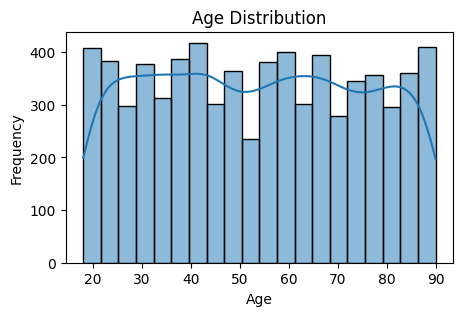

In [ ]:
# creating a histogram with Kernel Density Estimate (KDE) for the 'Age' column
plt.figure(figsize=(5, 3))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

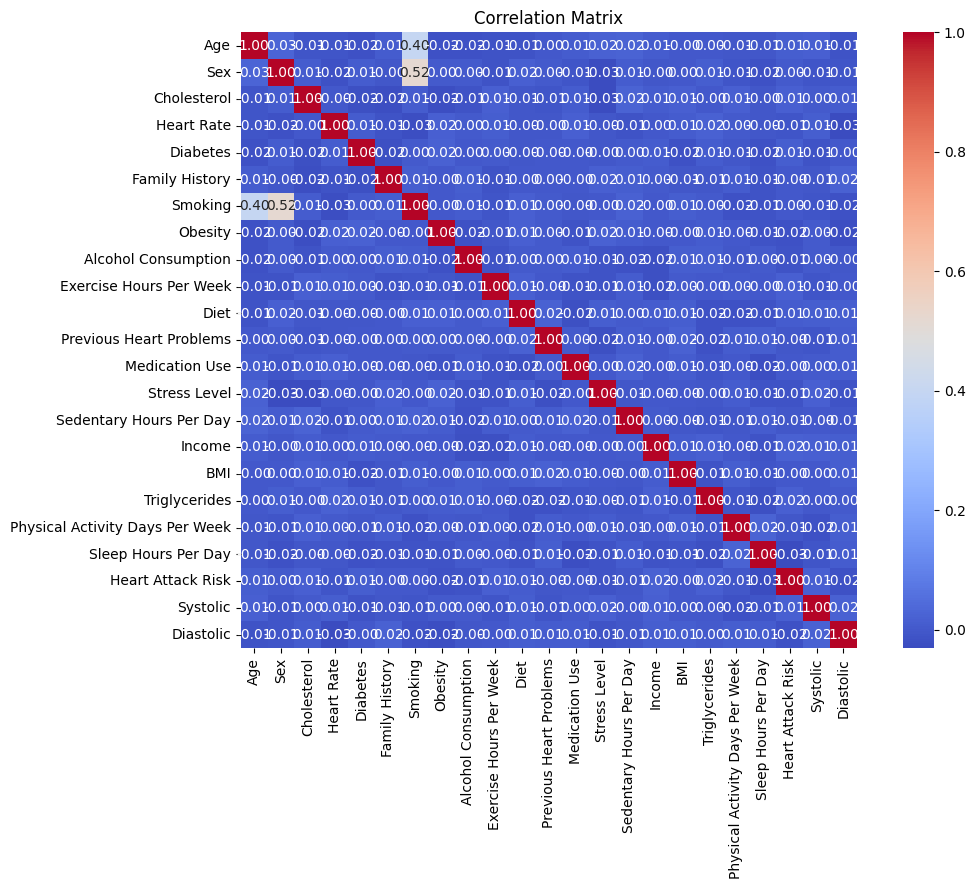

In [ ]:
# creating a heatmap to show the correlation matrix between numerical features
plt.figure(figsize=(12, 8))
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

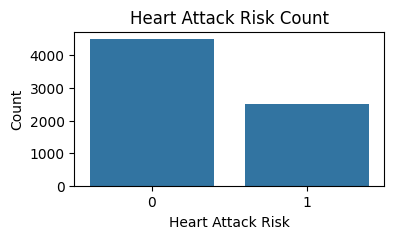

In [ ]:
# creating a count plot to visualize the distribution of 'Heart Attack Risk'
plt.figure(figsize=(4, 2))
sns.countplot(x='Heart Attack Risk', data=data)
plt.title('Heart Attack Risk Count')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Count')
plt.show()

In [ ]:
# creating a pair plot to visualize relationships between numerical columns, colored by 'Heart Attack Risk'
sns.pairplot(data, hue='Heart Attack Risk', diag_kind='kde')
plt.show()

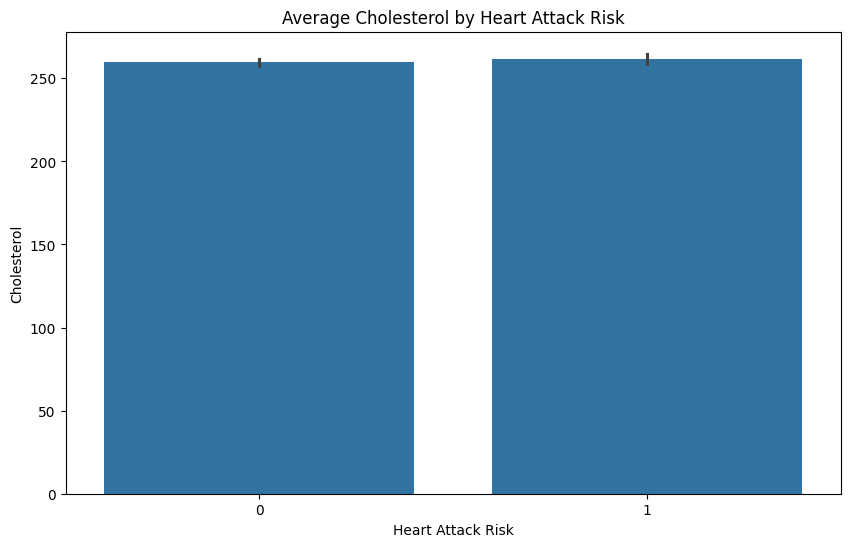

In [ ]:
# creating a bar plot to compare 'Heart Attack Risk' with average 'Cholesterol'
plt.figure(figsize=(10, 6))
sns.barplot(x='Heart Attack Risk', y='Cholesterol', data=data)
plt.title('Average Cholesterol by Heart Attack Risk')
plt.show()

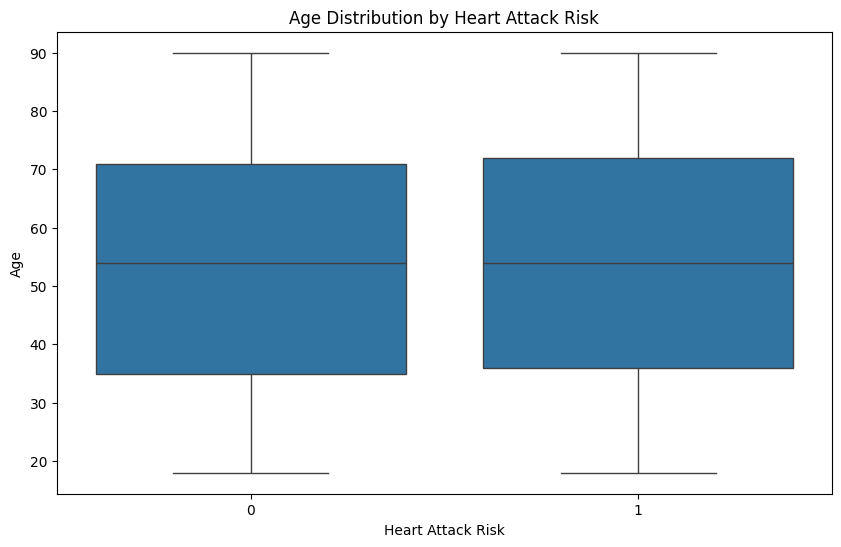

In [ ]:
# creating a box plot to compare 'Age' distribution across 'Heart Attack Risk' categories
plt.figure(figsize=(10, 6))
sns.boxplot(x='Heart Attack Risk', y='Age', data=data)
plt.title('Age Distribution by Heart Attack Risk')
plt.show()

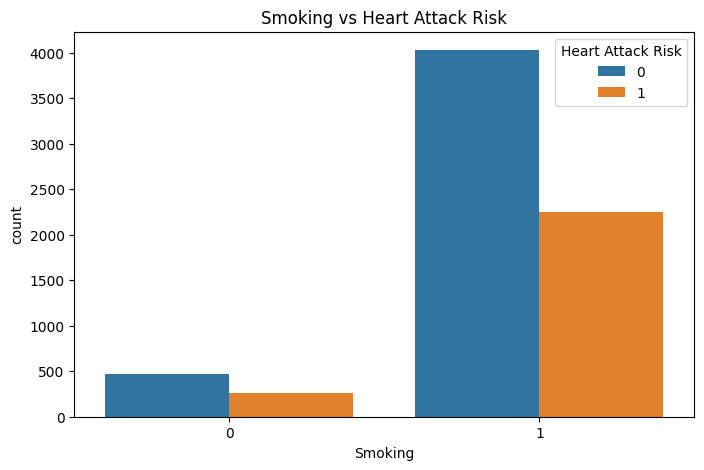

In [ ]:
# creating a count plot to compare smoking habits with 'Heart Attack Risk'
plt.figure(figsize=(8, 5))
sns.countplot(x='Smoking', hue='Heart Attack Risk', data=data)
plt.title('Smoking vs Heart Attack Risk')
plt.show()

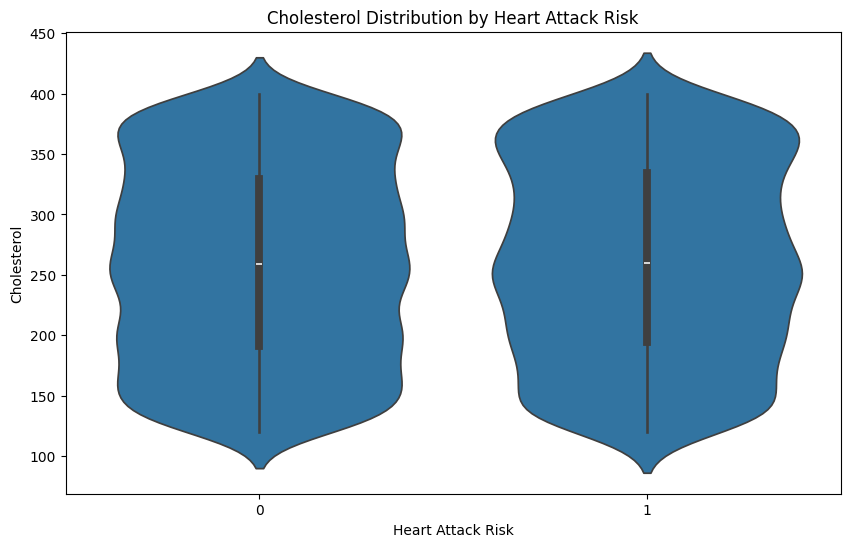

In [ ]:
# creating a violin plot to visualize 'Cholesterol' distribution across 'Heart Attack Risk' categories
plt.figure(figsize=(10, 6))
sns.violinplot(x='Heart Attack Risk', y='Cholesterol', data=data)
plt.title('Cholesterol Distribution by Heart Attack Risk')
plt.show()

In [ ]:
# creating a scatter plot to visualize the relationship between 'Cholesterol' and 'Triglycerides'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Cholesterol', y='Triglycerides', hue='Heart Attack Risk', data=data)
plt.title('Cholesterol vs Triglycerides by Heart Attack Risk')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# defining a list of numerical columns for density plots
numerical_columns = ['Age', 'Cholesterol', 'Heart Rate', 'Exercise Hours Per Week',
                     'Stress Level', 'Sedentary Hours Per Day', 'Income', 'BMI',
                     'Triglycerides', 'Physical Activity Days Per Week', 'Sleep Hours Per Day',
                     'Systolic', 'Diastolic']

# creating density plots for all numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1): # iterating through each numerical column
    plt.subplot(4, 4, i)
    sns.kdeplot(data[col], shade=True)
    plt.title(f'Density plot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
'''plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()'''

Feature extraction, analysis, selection

In [ ]:
# standardizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data.drop('Heart Attack Risk', axis=1))

# applying PCA
pca = PCA(n_components=5)
principal_components = pca.fit_transform(X_scaled)

# creating DataFrame with PCA results
pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(5)])
pca_df['Heart Attack Risk'] = data['Heart Attack Risk']
print(pca_df.head())

In [ ]:
# extracting features and target
X = data.drop('Heart Attack Risk', axis=1)
y = data['Heart Attack Risk']

# computing mutual information gain
mi = mutual_info_classif(X, y)
mi_df = pd.DataFrame({'Features': X.columns, 'Mutual Info': mi})
mi_df = mi_df.sort_values('Mutual Info', ascending=False)

print(mi_df)

In [ ]:
# using RandomForestClassifier for RFE
model = RandomForestClassifier()
rfe = RFE(estimator=model, n_features_to_select=5)  # Select top 5 features

# fitting RFE
X_rfe = X.fillna(0)
rfe.fit(X_rfe, y)

# displaying selected feature
selected_features = pd.DataFrame({'Feature': X.columns, 'Selected': rfe.support_})
print(selected_features[selected_features['Selected'] == True])


In [ ]:
# applying Lasso for feature selection
lasso = LassoCV(cv=5)
lasso.fit(X, y)

# getting selected features based on Lasso coefficients
lasso_selected = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
selected_features = lasso_selected[lasso_selected['Coefficient'] != 0]
print(selected_features)

In [ ]:
# computing information gain (entropy-based)
info_gain = mutual_info_classif(X, y)
info_gain_df = pd.DataFrame({'Feature': X.columns, 'Info Gain': info_gain})
info_gain_df = info_gain_df.sort_values(by='Info Gain', ascending=False)

print(info_gain_df)

In [ ]:
# computing correlation of all features with 'Heart Attack Risk'
correlation = data.corr()

# Sorting the correlation values with respect to 'Heart Attack Risk'
correlation_target = correlation['Heart Attack Risk'].sort_values(ascending=False)

# Displaying the correlation values
print(correlation_target)

# selecting features with absolute correlation higher than threshold (example: 0.2)
selected_features = correlation_target[correlation_target.abs() > 0.2].index.tolist()
print("Selected features based on correlation:\n", selected_features)

Visualisation after feature Extracton

In [ ]:
# creating new DataFrame after analyzing results
# List of selected features (example: assuming from RFE, Lasso, etc.)
selected_features = ['Cholesterol', 'Age', 'Triglycerides', 'Systolic', 'Diastolic', 'Heart Rate', 'BMI', 'Previous Heart Problems', 'Exercise Hours Per Week']
data_selected = data[selected_features + ['Heart Attack Risk']]

In [ ]:
# plotting correlation matrix for selected features
plt.figure(figsize=(10, 8))
correlation_selected = data_selected.corr()
sns.heatmap(correlation_selected, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Selected Features')
plt.show()

In [ ]:
# creating pair plot
sns.pairplot(data_selected, hue='Heart Attack Risk', diag_kind='kde')
plt.show()

In [ ]:
# plotting correlation with Heart Attack Risk
plt.figure(figsize=(8, 5))
correlation_target = data_selected.corr()['Heart Attack Risk'].sort_values(ascending=False)
sns.barplot(x=correlation_target.index, y=correlation_target.values)
plt.xticks(rotation=90)
plt.title('Correlation with Heart Attack Risk')
plt.show()

In [ ]:
# plotting heatmap of selected features' correlation
data_selected = data[selected_features]
plt.figure(figsize=(10, 8))
sns.heatmap(data_selected.corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

Model Selection

Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE

selected_features = [
    'Exercise Hours Per Week',
    'BMI',
    'Triglycerides',
    'Systolic',
    'Diastolic',
    'Sex',
    'Smoking',
    'Age',
    'Cholesterol',
    'Diabetes'
]

X = data[selected_features]
y = data['Heart Attack Risk']

# Step 1: Standardize the feature set
scaler = StandardScaler()
X_selected_scaled = scaler.fit_transform(X)

# Step 2: Split the dataset into train and test sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X_selected_scaled, y, test_size=0.3, stratify=y, random_state=42)

# Step 3: Apply SMOTE to balance the classes in the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 4: Hyperparameter tuning using GridSearchCV with Logistic Regression
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'max_iter': [100, 500, 1000],         # Number of iterations
    'solver': ['lbfgs', 'liblinear', 'saga']  # Solvers to try
}

log_reg = LogisticRegression(random_state=42)
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_resampled, y_train_resampled)

# Step 5: Use the best estimator to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]  # For AUC-ROC calculation

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Step 7: Calculate and print AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_prob)
print(f"AUC-ROC Score: {auc_roc}")

Decision Trees

In [ ]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import matplotlib.pyplot as plt

# Define feature set (using selected features and binary features)
X = data[['Cholesterol', 'Age', 'Triglycerides', 'Heart Rate', 'BMI',
           'Previous Heart Problems', 'Exercise Hours Per Week',
           'Diabetes', 'Smoking']]  # Add binary features here
y = data['Heart Attack Risk']  # Target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model with hyperparameter tuning
dt_model = DecisionTreeClassifier(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model to make predictions on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualizing the Decision Tree with the best parameters
# plt.figure(figsize=(20, 10))
# tree.plot_tree(best_model, feature_names=X.columns, class_names=['Low', 'Medium', 'High'], filled=True, rounded=True)
# plt.title('Decision Tree for Heart Attack Risk Prediction (Tuned)')
# plt.show()


Models

RANDOM FOREST

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
#file_path = '/content/drive/MyDrive/heart_attack_prediction_dataset.csv'
file_path = '/content/drive/My Drive/heart_attack_prediction_preprocessed.csv'
data = pd.read_csv(file_path)



# Define the selected top features and target variable
top_features = ['BMI', 'Sedentary Hours Per Day', 'Exercise Hours Per Week', 'Income',
                'Triglycerides', 'Cholesterol', 'Systolic', 'Age', 'Heart Rate','Diastolic']
target_column = 'Heart Attack Risk'
# Separate features (X) and the target variable (y)
X = data[top_features]
y = data[target_column]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=1100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nRandom Forest Accuracy: {accuracy * 100:.2f}%")

# Display a confusion matrix to evaluate true vs predicted labels
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

#Visualize the confusion matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Generate a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Risk', 'Risk']))

# Extract feature importance from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importance values
feature_importance_df = pd.DataFrame({'Feature': top_features, 'Importance': feature_importances})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print("\nFeature Importances:")
print(feature_importance_df)

# Plot the feature importance for visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# Predict probabilities for the positive class (Risk)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nROC-AUC Score: {roc_auc:.2f}")

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='b')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Linear Regression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = '/content/drive/My Drive/heart_attack_prediction_preprocessed.csv'
data = pd.read_csv(file_path)

# Define the selected top features and target variable
top_features = ['BMI', 'Sedentary Hours Per Day', 'Exercise Hours Per Week', 'Income',
                'Triglycerides', 'Cholesterol', 'Systolic', 'Age', 'Heart Rate', 'Diastolic']
target_column = 'Heart Attack Risk'

# Separate features (X) and the target variable (y)
X = data[top_features]
y = data[target_column]

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning for Ridge regression (Linear regression with L2 regularization)
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}  # Regularization strength
ridge_model = Ridge(random_state=42)

grid_search = GridSearchCV(estimator=ridge_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Select the best model
best_ridge_model = grid_search.best_estimator_
print(f"\nBest Hyperparameters: {grid_search.best_params_}")

# Train the best Ridge regression model on the training data
best_ridge_model.fit(X_train_scaled, y_train)

# Predict on the test set and train set
y_test_pred = best_ridge_model.predict(X_test_scaled)
y_train_pred = best_ridge_model.predict(X_train_scaled)

# Convert predictions to binary (classification threshold = 0.5)
y_test_pred_binary = (y_test_pred >= 0.5).astype(int)
y_train_pred_binary = (y_train_pred >= 0.5).astype(int)

# Evaluate the model accuracy
accuracy = accuracy_score(y_test, y_test_pred_binary)
print(f"\nLinear Regression Accuracy: {accuracy * 100:.2f}%")

# Display a confusion matrix to evaluate true vs predicted labels
conf_matrix = confusion_matrix(y_test, y_test_pred_binary)
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix with a heatmap
plt.figure(figsize=(3, 2))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Generate a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_binary, target_names=['No Risk', 'Risk']))

# Predict probabilities for the positive class (Risk)
y_test_prob = best_ridge_model.predict(X_test_scaled)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_test_prob)
print(f"\nROC-AUC Score: {roc_auc:.2f}")

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# Plot the ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='b')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Check for Overfitting/Underfitting
train_accuracy = accuracy_score(y_train, y_train_pred_binary)
test_accuracy = accuracy_score(y_test, y_test_pred_binary)
print(f"\nTraining Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

print("\nOverfitting/Underfitting Analysis:")
if train_accuracy > test_accuracy and abs(train_accuracy - test_accuracy) > 0.1:
    print("The model may be overfitting.")
elif test_accuracy > train_accuracy and abs(train_accuracy - test_accuracy) > 0.1:
    print("The model may be underfitting.")
else:
    print("The model has a good balance between train and test performance.")

# Feature importance (using absolute coefficients)
coefficients = best_ridge_model.coef_
feature_importance_df = pd.DataFrame({'Feature': top_features, 'Coefficient': coefficients})
feature_importance_df['Absolute Importance'] = np.abs(feature_importance_df['Coefficient'])
feature_importance_df = feature_importance_df.sort_values(by='Absolute Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)

# Plot the feature importance for visualization
plt.figure(figsize=(6, 4))
sns.barplot(x='Absolute Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# SVM

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
file_path = '/content/drive/My Drive/heart_attack_prediction_preprocessed.csv'
data = pd.read_csv(file_path)


# Define the selected top features and target variable
top_features = ['BMI', 'Sedentary Hours Per Day', 'Exercise Hours Per Week', 'Income',
                'Triglycerides', 'Cholesterol', 'Systolic', 'Age', 'Heart Rate', 'Diastolic']
target_column = 'Heart Attack Risk'

# Separate features (X) and the target variable (y)
X = data[top_features]
y = data[target_column]

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the feature set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning for SVM
param_grid = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'linear']}
svm_model = SVC(probability=True, random_state=42)

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=0)
grid_search.fit(X_train_scaled, y_train)

# Select the best model
best_svm_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")

Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
# Evaluate the model
y_test_prob = best_svm_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
y_test_pred = (y_test_prob >= 0.5).astype(int)  # Binary predictions

# Accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print(f"\nConfusion Matrix:\n{conf_matrix}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=['No Risk', 'Risk']))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_test_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

Test Accuracy: 64.19%

Confusion Matrix:
[[900   0]
 [502   0]]

Classification Report:
              precision    recall  f1-score   support

     No Risk       0.64      1.00      0.78       900
        Risk       0.00      0.00      0.00       502

    accuracy                           0.64      1402
   macro avg       0.32      0.50      0.39      1402
weighted avg       0.41      0.64      0.50      1402

ROC-AUC Score: 0.48


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


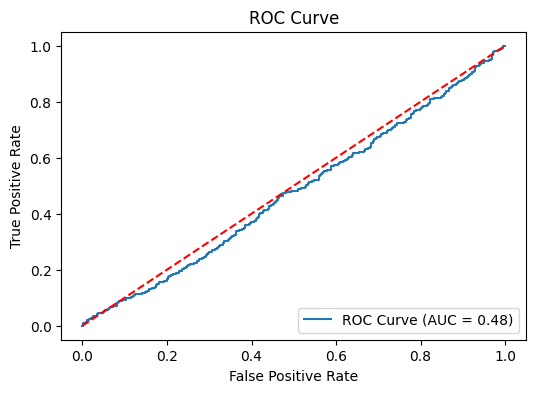


Feature Importances (Linear Kernel):
                   Feature  Coefficient
2  Exercise Hours Per Week     0.000045
1  Sedentary Hours Per Day     0.000032
0                      BMI     0.000025
3                   Income     0.000020
4            Triglycerides     0.000012
9                Diastolic     0.000002
7                      Age    -0.000007
8               Heart Rate    -0.000007
6                 Systolic    -0.000018
5              Cholesterol    -0.000044

Training Accuracy: 64.18%
Good balance between training and test accuracy.


In [ ]:

# ROC Curve (Optional: Run this if visualization is needed)
plt.figure(figsize=(6, 4))
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Feature Importance Approximation (Optional for linear kernels)
if grid_search.best_params_['kernel'] == 'linear':
    feature_importance = pd.DataFrame({
        'Feature': top_features,
        'Coefficient': best_svm_model.coef_[0]
    }).sort_values(by='Coefficient', ascending=False)
    print("\nFeature Importances (Linear Kernel):")
    print(feature_importance)

# Overfitting/Underfitting Check
train_accuracy = accuracy_score(y_train, (best_svm_model.predict_proba(X_train_scaled)[:, 1] >= 0.5).astype(int))
print(f"\nTraining Accuracy: {train_accuracy * 100:.2f}%")
if train_accuracy > accuracy and abs(train_accuracy - accuracy) > 0.1:
    print("Model may be overfitting.")
elif accuracy > train_accuracy and abs(train_accuracy - accuracy) > 0.1:
    print("Model may be underfitting.")
else:
    print("Good balance between training and test accuracy.")


Best Hyperparameters: {'C': 1, 'kernel': 'linear'}
Test Accuracy: 64.19%

Feature Importances (Linear Kernel):
                   Feature  Coefficient  Absolute Importance
2  Exercise Hours Per Week     0.000045             0.000045
5              Cholesterol    -0.000044             0.000044
1  Sedentary Hours Per Day     0.000032             0.000032
0                      BMI     0.000025             0.000025
3                   Income     0.000020             0.000020
6                 Systolic    -0.000018             0.000018
4            Triglycerides     0.000012             0.000012
8               Heart Rate    -0.000007             0.000007
7                      Age    -0.000007             0.000007
9                Diastolic     0.000002             0.000002


<ipython-input-46-64c6d7be613a>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Absolute Importance', y='Feature', data=feature_importance_df, palette='viridis')


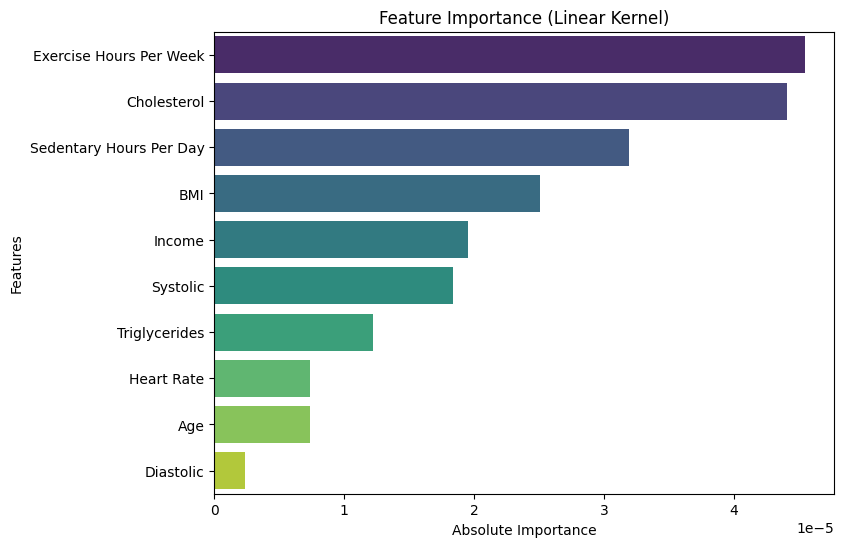

In [ ]:
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear']}  # Only linear kernel for feature importance
svm_model = SVC(probability=True, random_state=42)

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=0)
grid_search.fit(X_train_scaled, y_train)

# Select the best model
best_svm_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Evaluate the model
y_test_prob = best_svm_model.predict_proba(X_test_scaled)[:, 1]
y_test_pred = (y_test_prob >= 0.5).astype(int)

accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

# Feature Importance (Applicable for Linear Kernel)
coefficients = best_svm_model.coef_[0]  # Extract coefficients
feature_importance_df = pd.DataFrame({
    'Feature': top_features,
    'Coefficient': coefficients
})
feature_importance_df['Absolute Importance'] = feature_importance_df['Coefficient'].abs()
feature_importance_df = feature_importance_df.sort_values(by='Absolute Importance', ascending=False)

print("\nFeature Importances (Linear Kernel):")
print(feature_importance_df)

# Visualization of Feature Importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Absolute Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance (Linear Kernel)')
plt.xlabel('Absolute Importance')
plt.ylabel('Features')
plt.show()


PERCEPTRON

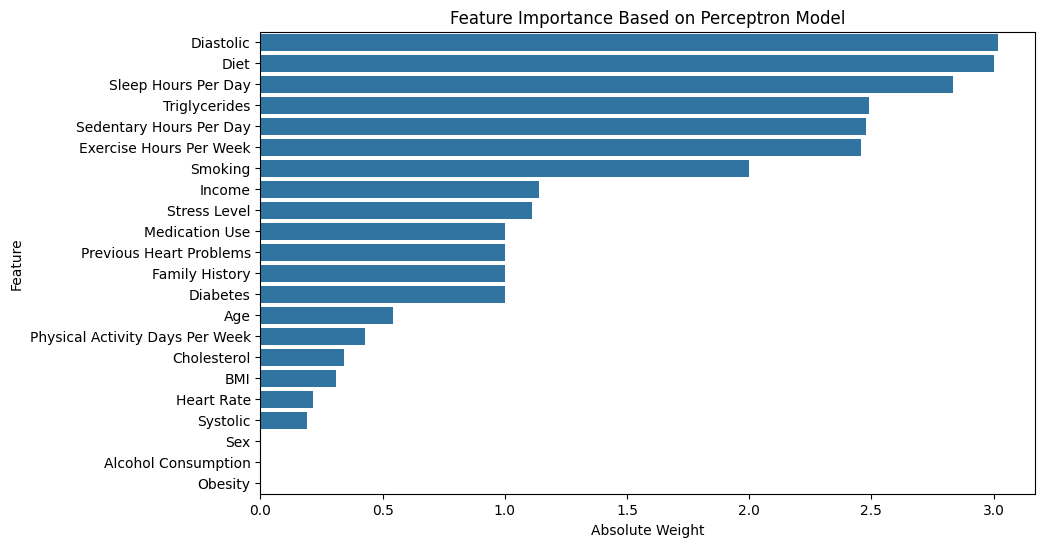


Perceptron Accuracy with Selected Features: 65.76%


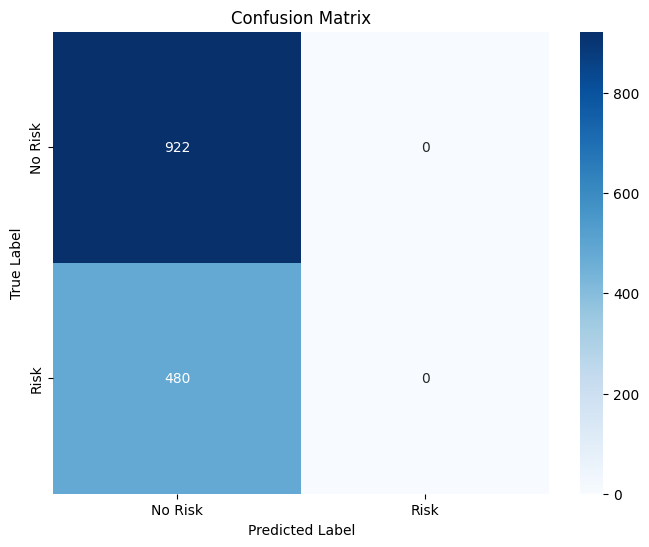


Classification Report:
              precision    recall  f1-score   support

     No Risk       0.66      1.00      0.79       922
        Risk       0.00      0.00      0.00       480

    accuracy                           0.66      1402
   macro avg       0.33      0.50      0.40      1402
weighted avg       0.43      0.66      0.52      1402



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


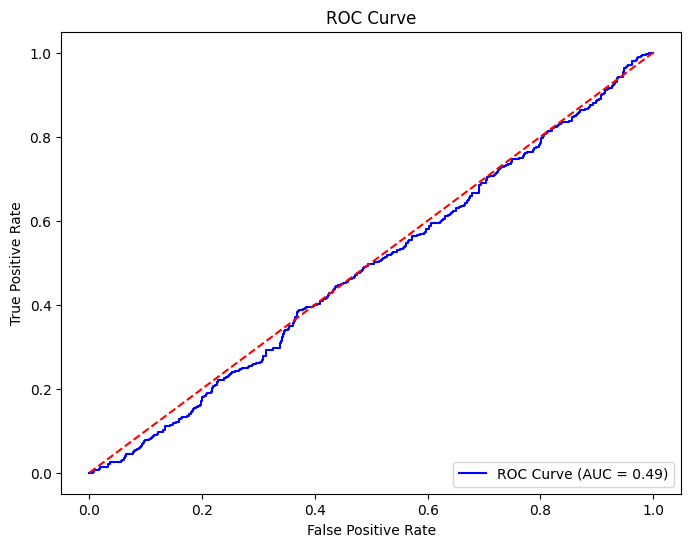


Training Accuracy with Selected Features: 63.78%
Testing Accuracy: 65.76%

The model generalizes well.


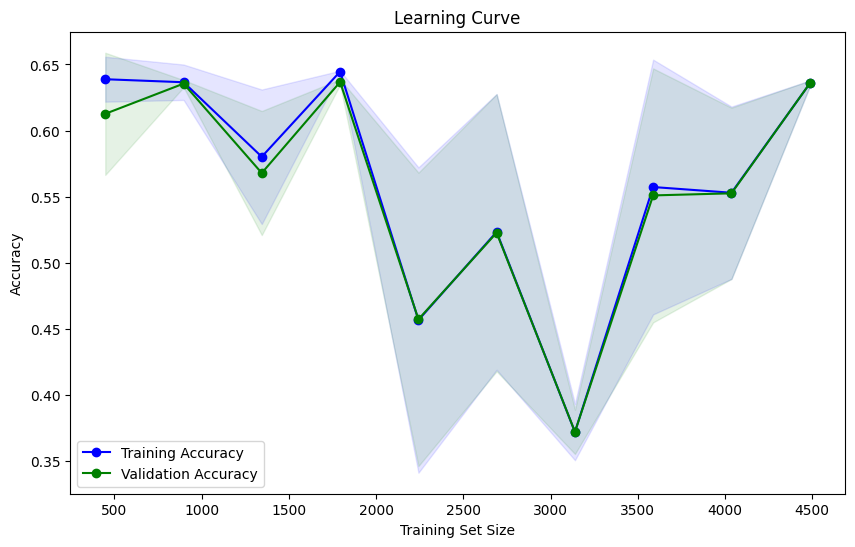

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load and preprocess the dataset
file_path = '/content/drive/My Drive/heart_attack_prediction_preprocessed.csv'
data = pd.read_csv(file_path)
target_column = 'Heart Attack Risk'
X = data.drop(columns=[target_column])
y = data[target_column]

# Normalize features
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Perceptron model
perceptron_model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron_model.fit(X_train, y_train)

# Extract feature importance
feature_weights = perceptron_model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': data.drop(columns=[target_column]).columns,
    'Weight': feature_weights
})
feature_importance['Absolute Weight'] = feature_importance['Weight'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Weight', ascending=False)

# Visualize feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Weight', y='Feature', data=feature_importance)
plt.title('Feature Importance Based on Perceptron Model')
plt.xlabel('Absolute Weight')
plt.ylabel('Feature')
plt.show()

# Select the top 10 features
top_10_features = feature_importance['Feature'].head(10).tolist()

# Reduce dataset to top 10 features
X_train_selected = X_train[:, [list(data.drop(columns=[target_column]).columns).index(f) for f in top_10_features]]
X_test_selected = X_test[:, [list(data.drop(columns=[target_column]).columns).index(f) for f in top_10_features]]

# Retrain the model with selected features
perceptron_model_selected = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron_model_selected.fit(X_train_selected, y_train)

# Evaluate model performance
y_pred = perceptron_model_selected.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nPerceptron Accuracy with Selected Features: {accuracy * 100:.2f}%")
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Risk', 'Risk']))

# ROC Curve and AUC
y_scores = perceptron_model_selected.decision_function(X_test_selected)
y_prob = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min())
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='b')
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Overfitting/Underfitting check
y_train_pred = perceptron_model_selected.predict(X_train_selected)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nTraining Accuracy with Selected Features: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {accuracy * 100:.2f}%")

if train_accuracy > accuracy + 0.1:
    print("\nWarning: The model may be overfitting.")
elif train_accuracy < accuracy - 0.1:
    print("\nWarning: The model may be underfitting.")
else:
    print("\nThe model generalizes well.")

# Learning curve
train_sizes, train_scores, test_scores = learning_curve(
    perceptron_model_selected, X_train_selected, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_mean, 'o-', color='green', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

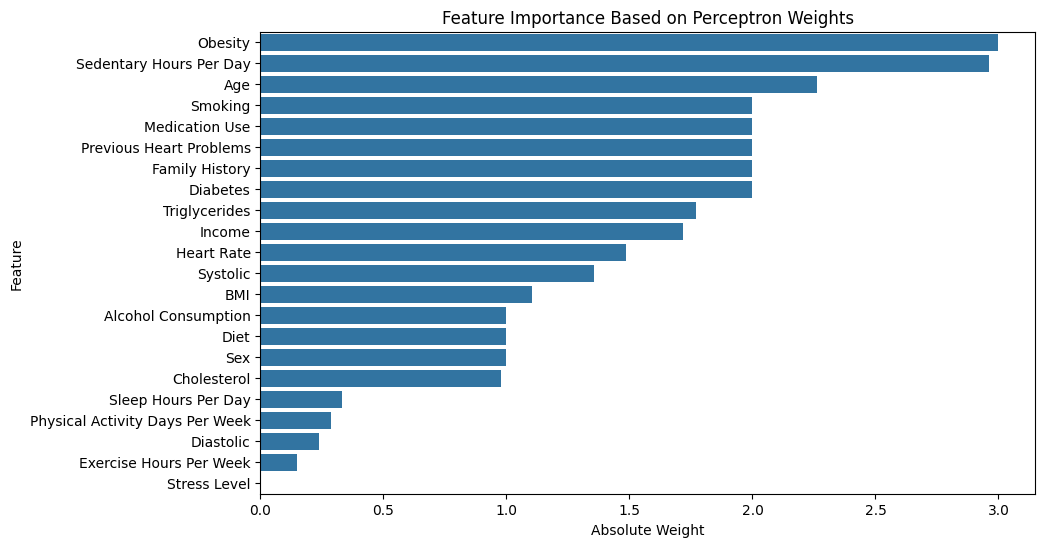

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits

Best Parameters for Perceptron: {'alpha': 0.001, 'early_stopping': False, 'eta0': 0.001, 'max_iter': 1000, 'penalty': 'l1', 'warm_start': True}

Optimized Perceptron Accuracy with Selected Features: 65.76%


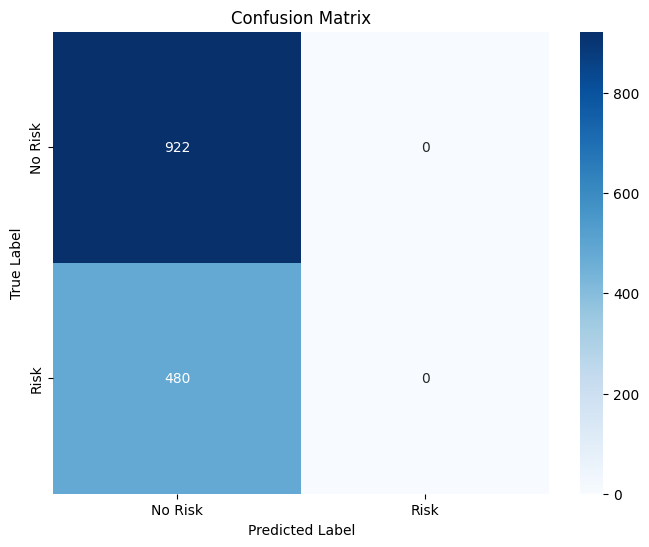


Classification Report:
              precision    recall  f1-score   support

     No Risk       0.66      1.00      0.79       922
        Risk       0.00      0.00      0.00       480

    accuracy                           0.66      1402
   macro avg       0.33      0.50      0.40      1402
weighted avg       0.43      0.66      0.52      1402


NaN values detected in predicted probabilities. Handling NaNs...

ROC-AUC Score: 0.50


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
<ipython-input-48-13cb099600e6>:88: RuntimeWarnin

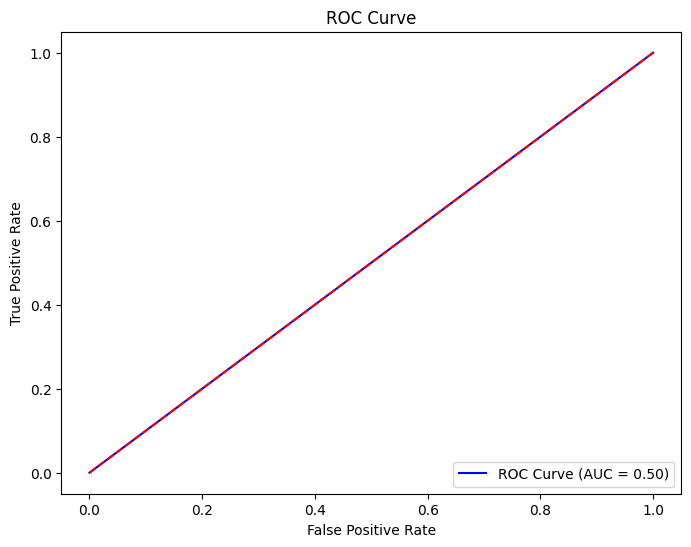


Training Accuracy with Selected Features: 63.78%
Testing Accuracy: 65.76%

The model generalizes well.


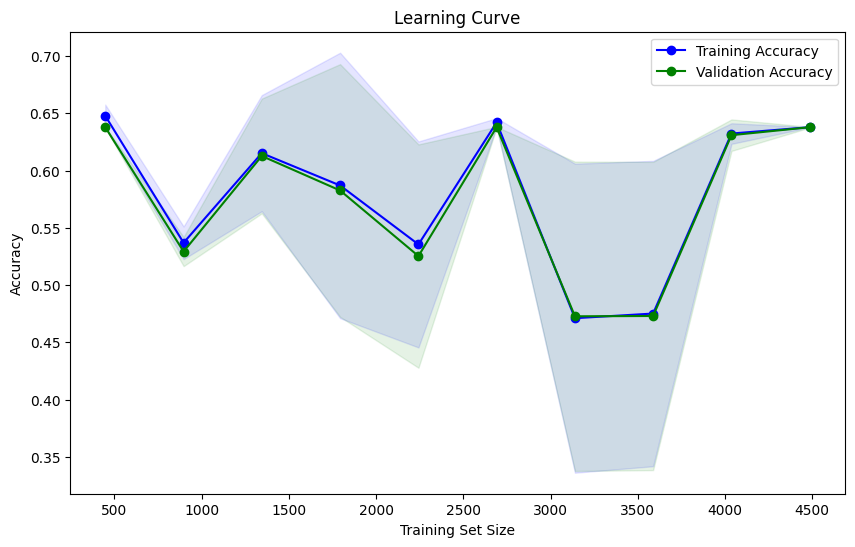

In [ ]:
# Import necessary libraries for data processing, modeling, and evaluation
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Load the dataset and define the target column
file_path = '/content/drive/My Drive/heart_attack_prediction_preprocessed.csv'
data = pd.read_csv(file_path)
target_column = 'Heart Attack Risk'

# Separate features (X) and target (y), then normalize the features for Perceptron
X = data.drop(columns=[target_column])
y = data[target_column]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Use Perceptron to determine feature importance based on model coefficients
perceptron = Perceptron(random_state=42)
perceptron.fit(X, y)
feature_weights = perceptron.coef_[0]  # Extract weights from the Perceptron model

# Create and sort a DataFrame for feature importance visualization
feature_importance = pd.DataFrame({
    'Feature': data.drop(columns=[target_column]).columns,
    'Weight': feature_weights
})
feature_importance['Absolute Weight'] = feature_importance['Weight'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Weight', ascending=False)

# Plot feature importance using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Weight', y='Feature', data=feature_importance)
plt.title('Feature Importance Based on Perceptron Weights')
plt.xlabel('Absolute Weight')
plt.ylabel('Feature')
plt.show()

# Select the top 10 features based on importance
top_10_features = feature_importance['Feature'].head(10).tolist()
X_selected = X[:, [list(data.drop(columns=[target_column]).columns).index(f) for f in top_10_features]]

# Split the dataset into training and testing sets using the selected features
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Perform hyperparameter tuning on Perceptron using GridSearchCV
param_grid = {
    'penalty': ['l2', 'l1', 'elasticnet', None],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
    'eta0': [0.1, 0.01, 0.001, 0.0001],
    'max_iter': [1000, 2000, 5000, 10000],
    'early_stopping': [True, False],
    'warm_start': [True, False]
}
grid_search = GridSearchCV(Perceptron(random_state=42), param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("\nBest Parameters for Perceptron:", best_params)

# Train the best Perceptron model from the grid search on the training data
best_perceptron = grid_search.best_estimator_
best_perceptron.fit(X_train, y_train)

# Evaluate the model
y_pred = best_perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nOptimized Perceptron Accuracy with Selected Features: {accuracy * 100:.2f}%")
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Risk', 'Risk']))

# Perform ROC-AUC analysis by calculating probabilities and plotting the ROC curve
y_scores = best_perceptron.decision_function(X_test)
y_prob = (y_scores - y_scores.min()) / (y_scores.max() - y_scores.min())
if any(pd.isna(y_prob)):
    print("\nNaN values detected in predicted probabilities. Handling NaNs...")
    y_prob = pd.Series(y_prob).fillna(0).values

try:
    roc_auc = roc_auc_score(y_test, y_prob)
    print(f"\nROC-AUC Score: {roc_auc:.2f}")
except ValueError as e:
    print(f"Error in ROC-AUC calculation: {e}")

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='b')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Check for overfitting/underfitting
y_train_pred = best_perceptron.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"\nTraining Accuracy with Selected Features: {train_accuracy * 100:.2f}%")
print(f"Testing Accuracy: {accuracy * 100:.2f}%")

if train_accuracy > accuracy + 0.1:
    print("\nWarning: The model may be overfitting.")
elif train_accuracy < accuracy - 0.1:
    print("\nWarning: The model may be underfitting.")
else:
    print("\nThe model generalizes well.")

# Generate a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_perceptron, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy', color='blue')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.plot(train_sizes, test_mean, 'o-', label='Validation Accuracy', color='green')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

KNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.combine import SMOTEENN
from sklearn.feature_selection import mutual_info_classif

# Load the dataset
heart_data = pd.read_csv('/content/drive/My Drive/heart_attack_prediction_preprocessed.csv')

# Define the top features and target column
top_features = ['BMI', 'Sedentary Hours Per Day', 'Exercise Hours Per Week', 'Income',
                'Triglycerides', 'Cholesterol', 'Systolic', 'Age', 'Heart Rate', 'Diastolic']
target_column = 'Heart Attack Risk'

# Normalize the selected top features
scaler = MinMaxScaler()
heart_data_normalized = heart_data[top_features].copy()
heart_data_normalized = pd.DataFrame(scaler.fit_transform(heart_data_normalized), columns=top_features)

# Add the target column back for splitting
heart_data_normalized[target_column] = heart_data[target_column]

# Feature Selection using Mutual Information
X = heart_data_normalized[top_features]
y = heart_data_normalized[target_column]
mi_scores = mutual_info_classif(X, y)
selected_features = X.columns[mi_scores > 0.01]  # Keep features with significant MI
X = X[selected_features]

# Generate polynomial features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = pd.DataFrame(poly.fit_transform(X), columns=poly.get_feature_names_out(X.columns))

# Balance the dataset using SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_balanced, y_balanced = smote_enn.fit_resample(X_poly, y)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42, stratify=y_balanced)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_neighbors': range(1, 31),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
knn = grid_search.best_estimator_

# Evaluate the tuned model
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the results
print("Best Parameters:", best_params)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
Accuracy: 0.9721577726218097

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       204
           1       0.97      0.97      0.97       227

    accuracy                           0.97       431
   macro avg       0.97      0.97      0.97       431
weighted avg       0.97      0.97      0.97       431


Confusion Matrix:
 [[198   6]
 [  6 221]]


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/My Drive/heart_attack_prediction_preprocessed.csv'
data = pd.read_csv(file_path)

# Select features for clustering (you can customize this)
features = ['BMI', 'Sedentary Hours Per Day', 'Exercise Hours Per Week', 'Income',
            'Triglycerides', 'Cholesterol', 'Systolic', 'Age', 'Heart Rate', 'Diastolic']
X = data[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Hyperparameter tuning: finding the optimal number of clusters using Elbow and Silhouette methods
inertia_scores = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_scores.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plotting Elbow Method (Inertia)
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia_scores, marker='o')
plt.title('Elbow Method (Inertia)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

# Plotting Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Selecting the optimal k (highest Silhouette score)
optimal_k = k_values[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")

# Train final K-means model with optimal k
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_kmeans.fit(X_scaled)
data['Cluster'] = final_kmeans.labels_

# Visualizing clusters (Example: Age vs BMI)
plt.figure(figsize=(10, 6))
for cluster in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Age'], cluster_data['BMI'], label=f'Cluster {cluster}')

plt.title(f'K-means Clustering (Optimal k={optimal_k})')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend()
plt.show()

# Get the average silhouette score per cluster
cluster_silhouette_scores = {}
for cluster in range(optimal_k):
    cluster_data = data[data['Cluster'] == cluster]
    cluster_silhouette_scores[cluster] = silhouette_score(X_scaled, final_kmeans.labels_)

# Print clusters with the highest silhouette scores
best_cluster = max(cluster_silhouette_scores, key=cluster_silhouette_scores.get)
print(f"Best Cluster (highest silhouette score): Cluster {best_cluster}")
print("Cluster Characteristics (mean values for key features):")
print(data[data['Cluster'] == best_cluster][features].mean())

# Optionally, print top rows (first 5 rows) of the best cluster
print("\nTop data points in the best cluster:")
print(data[data['Cluster'] == best_cluster].head())

# Identify other "good" clusters (those with a silhouette score > 0.5, for instance)
good_clusters = [cluster for cluster, score in cluster_silhouette_scores.items() if score > 0.5]
print("\nClusters with silhouette scores above 0.5:")
for cluster in good_clusters:
    print(f"Cluster {cluster}: Average Silhouette Score = {cluster_silhouette_scores[cluster]}")
    print("Cluster Characteristics (mean values for key features):")
    print(data[data['Cluster'] == cluster][features].mean())
    print()
